<a href="https://colab.research.google.com/github/Susanarias/TAREA2/blob/main/8_The_ARIMA_and_SARIMAX_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Index_modified.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
'''df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')'''

"df_comp=df_comp.asfreq('b')\ndf_comp=df_comp.fillna(method='ffill')"

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

The LLR Test

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Creating Returns

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

ARMA(1,1)

In [ ]:
model_ret_ar_1_ma_1 = ARIMA(df.returns[1:], order=(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9497.517
Date:                Sun, 15 Oct 2023   AIC                          19003.034
Time:                        01:51:36   BIC                          19029.963
Sample:                             0   HQIC                         19012.370
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.012      1.525      0.127      -0.005       0.043
ar.L1          0.8192      0.033     24.541      0.000       0.754       0.885
ma.L1         -0.8607      0.030    -29.054      0.000      -0.919      -0.803
sigma2         1.2534      0.011    110.186      0.000       1.231       1.276
===================================================================================
Ljung-Box (L1) (Q):                   2.25   Jarque-Bera (JB):              9745.04
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1 = ARIMA(df.returns[1:], order = (1,0,0))
model_ret_ma_1 = ARIMA(df.returns[1:], order = (0,0,1))

In [ ]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))



ARMA vs AR  0.0

ARMA vs MA  0.0


Higher-Lag ARMA Models

In [ ]:

model_ret_ar_3_ma_3 = ARIMA(df.returns[1:], order=(3,0,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [ ]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [ ]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -9480.133
Date:                Sun, 15 Oct 2023   AIC                          18976.267
Time:                        01:53:55   BIC                          19030.125
Sample:                             0   HQIC                         18994.939
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.495      0.135      -0.006       0.044
ar.L1         -0.1362      0.070     -1.949      0.051      -0.273       0.001
ar.L2         -0.1877      0.056     -3.346      0.001      -0.298      -0.078
ar.L3          0.5026      0.060      8.401      0.000       0.385       0.620
ma.L1          0.1217      0.066      1.831      0.067      -0.009       0.252
ma.L2          0.1264      0.055      2.317      0.020       0.019       0.233
ma.L3         -0.5803      0.056    -10.376      0.000      -0.690      -0.471
sigma2         1.2464      0.012    104.079      0.000       1.223       1.270
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              8987.76
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_3_ma_2 = ARIMA(df.returns[1:], order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -9486.766
Date:                Sun, 15 Oct 2023   AIC                          18987.533
Time:                        01:54:14   BIC                          19034.659
Sample:                             0   HQIC                         19003.871
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.457      0.145      -0.007       0.044
ar.L1         -0.2462      0.078     -3.164      0.002      -0.399      -0.094
ar.L2          0.2346      0.080      2.926      0.003       0.077       0.392
ar.L3         -0.0811      0.008    -10.248      0.000      -0.097      -0.066
ma.L1          0.2257      0.078      2.886      0.004       0.072       0.379
ma.L2         -0.2862      0.080     -3.578      0.000      -0.443      -0.129
sigma2         1.2490      0.012    104.776      0.000       1.226       1.272
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8772.99
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_2_ma_3 = ARIMA(df.returns[1:], order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -9483.634
Date:                Sun, 15 Oct 2023   AIC                          18981.269
Time:                        01:54:35   BIC                          19028.395
Sample:                             0   HQIC                         18997.607
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.423      0.155      -0.007       0.045
ar.L1         -0.5436      0.070     -7.715      0.000      -0.682      -0.405
ar.L2         -0.1237      0.077     -1.599      0.110      -0.275       0.028
ma.L1          0.5255      0.070      7.466      0.000       0.388       0.663
ma.L2          0.0621      0.077      0.810      0.418      -0.088       0.212
ma.L3         -0.1012      0.007    -13.525      0.000      -0.116      -0.087
sigma2         1.2478      0.012    103.302      0.000       1.224       1.271
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8480.14
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.008

In [ ]:
model_ret_ar_3_ma_1 = ARIMA(df.returns[1:], order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -9486.070
Date:                Sun, 15 Oct 2023   AIC                          18984.140
Time:                        01:55:51   BIC                          19024.534
Sample:                             0   HQIC                         18998.144
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.429      0.153      -0.007       0.045
ar.L1         -0.5078      0.068     -7.436      0.000      -0.642      -0.374
ar.L2         -0.0583      0.008     -7.211      0.000      -0.074      -0.042
ar.L3         -0.0926      0.007    -12.891      0.000      -0.107      -0.079
ma.L1          0.4895      0.069      7.047      0.000       0.353       0.626
sigma2         1.2487      0.012    104.470      0.000       1.225       1.272
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8624.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

1.0

In [ ]:
model_ret_ar_2_ma_2 = ARIMA(df.returns[1:], order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9493.224
Date:                Sun, 15 Oct 2023   AIC                          18998.447
Time:                        01:56:31   BIC                          19038.841
Sample:                             0   HQIC                         19012.452
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.012      1.526      0.127      -0.005       0.043
ar.L1         -0.1618      0.033     -4.954      0.000      -0.226      -0.098
ar.L2          0.8229      0.033     25.175      0.000       0.759       0.887
ma.L1          0.1176      0.029      4.024      0.000       0.060       0.175
ma.L2         -0.8578      0.029    -29.404      0.000      -0.915      -0.801
sigma2         1.2516      0.012    105.984      0.000       1.228       1.275
===================================================================================
Ljung-Box (L1) (Q):                   3.38   Jarque-Bera (JB):              9244.04
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_3 = ARIMA(df.returns[1:], order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -9483.767
Date:                Sun, 15 Oct 2023   AIC                          18979.534
Time:                        01:56:36   BIC                          19019.928
Sample:                             0   HQIC                         18993.539
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.448      0.148      -0.007       0.045
ar.L1         -0.4690      0.065     -7.192      0.000      -0.597      -0.341
ma.L1          0.4510      0.066      6.860      0.000       0.322       0.580
ma.L2         -0.0608      0.008     -7.740      0.000      -0.076      -0.045
ma.L3         -0.1003      0.007    -14.013      0.000      -0.114      -0.086
sigma2         1.2478      0.012    104.255      0.000       1.224       1.271
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8509.35
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)



 ARMA(3,2): 	LL =  -9486.76631716923 	AIC =  18987.53263433846

 ARMA(1,3): 	LL =  -9483.767205693184 	AIC =  18979.53441138637


Residuals for Returns

In [ ]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

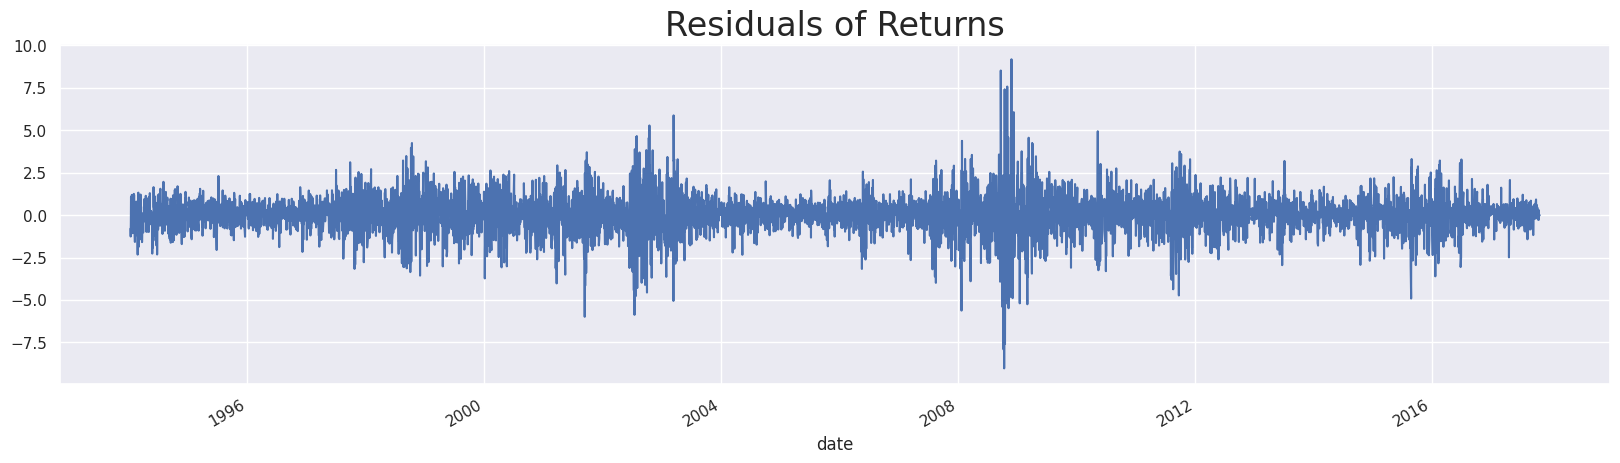

In [ ]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

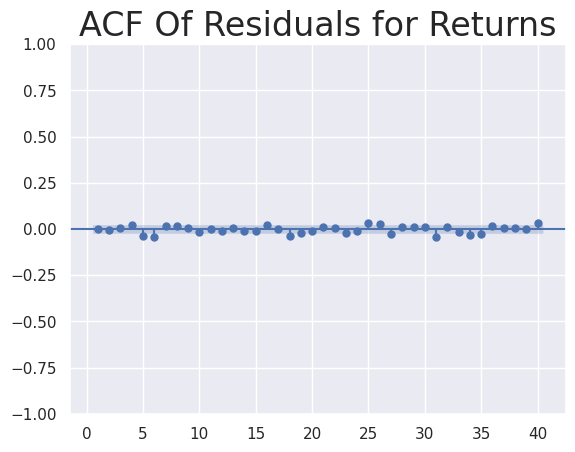

In [ ]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

Reevaluating Model Selection

In [ ]:
model_ret_ar_5_ma_5 = ARIMA(df.returns[1:], order=(5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -9469.241
Date:                Sun, 15 Oct 2023   AIC                          18962.482
Time:                        01:58:40   BIC                          19043.270
Sample:                             0   HQIC                         18990.491
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.012      1.566      0.117      -0.005       0.044
ar.L1         -0.1128      0.113     -0.998      0.318      -0.334       0.109
ar.L2         -0.4555      0.071     -6.448      0.000      -0.594      -0.317
ar.L3          0.0066      0.066      0.101      0.920      -0.122       0.135
ar.L4          0.3372      0.065      5.167      0.000       0.209       0.465
ar.L5          0.2760      0.089      3.106      0.002       0.102       0.450
ma.L1          0.0930      0.112      0.829      0.407      -0.127       0.313
ma.L2          0.4061      0.070      5.765      0.000       0.268       0.544
ma.L3         -0.0838      0.064     -1.311      0.190      -0.209       0.041
ma.L4         -0.3300      0.063     -5.220      0.000      -0.454      -0.206
ma.L5         -0.3465      0.085     -4.052      0.000      -0.514      -0.179
sigma2         1.2436      0.012    100.953      0.000       1.219       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8459.46
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_5_ma_1 = ARIMA(df.returns[1:], order=(5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -9475.486
Date:                Sun, 15 Oct 2023   AIC                          18966.973
Time:                        02:00:25   BIC                          19020.831
Sample:                             0   HQIC                         18985.645
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.502      0.133      -0.006       0.044
ar.L1          0.3245      0.100      3.237      0.001       0.128       0.521
ar.L2         -0.0456      0.008     -5.569      0.000      -0.062      -0.030
ar.L3         -0.0528      0.009     -5.846      0.000      -0.070      -0.035
ar.L4          0.0511      0.010      4.991      0.000       0.031       0.071
ar.L5         -0.0720      0.007     -9.796      0.000      -0.086      -0.058
ma.L1         -0.3434      0.101     -3.398      0.001      -0.541      -0.145
sigma2         1.2445      0.012    103.995      0.000       1.221       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8573.57
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_5 = ARIMA(df.returns[1:], order=(1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6200
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -9476.512
Date:                Sun, 15 Oct 2023   AIC                          18969.024
Time:                        02:00:35   BIC                          19022.882
Sample:                             0   HQIC                         18987.696
                               - 6200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.013      1.505      0.132      -0.006       0.044
ar.L1          0.3039      0.118      2.572      0.010       0.072       0.535
ma.L1         -0.3238      0.119     -2.730      0.006      -0.556      -0.091
ma.L2         -0.0422      0.008     -5.035      0.000      -0.059      -0.026
ma.L3         -0.0543      0.010     -5.558      0.000      -0.074      -0.035
ma.L4          0.0518      0.012      4.434      0.000       0.029       0.075
ma.L5         -0.0637      0.008     -8.399      0.000      -0.079      -0.049
sigma2         1.2449      0.012    103.522      0.000       1.221       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8591.66
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)


ARMA(5,1):  	 LL =  -9475.486351959837 	 AIC =  18966.972703919673
ARMA(1,5):  	 LL =  -9476.511948046895 	 AIC =  18969.02389609379


In [ ]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)


ARMA(3,2):  	 LL =  -9486.76631716923 	 AIC =  18987.53263433846


Residuals for the New Model

In [ ]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

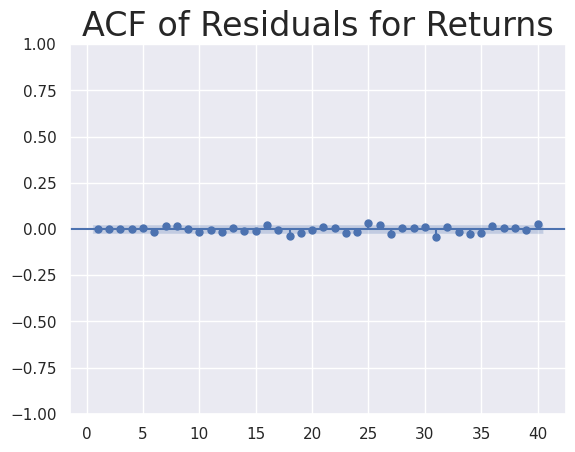

In [ ]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

ARMA Models for Prices

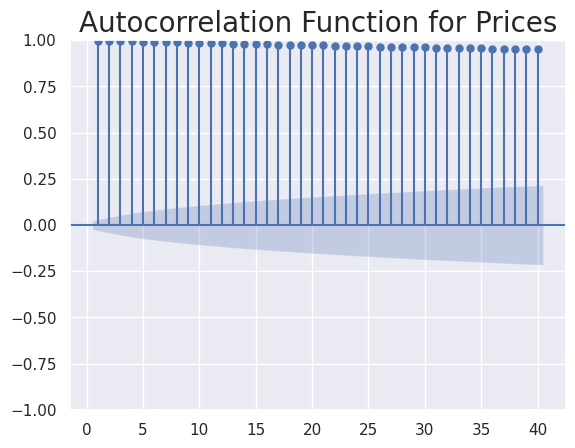

In [ ]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

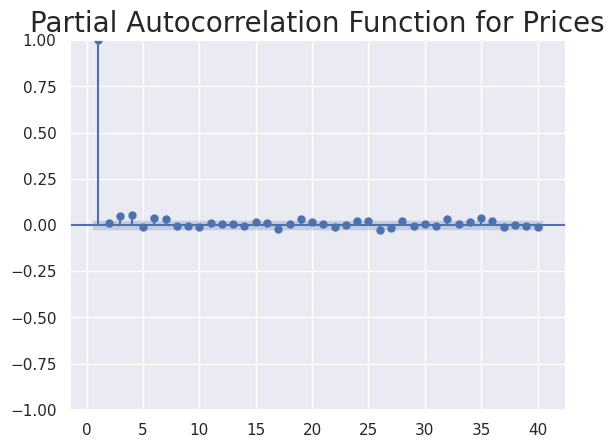

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
model_ar_1_ma_1 = ARIMA(df.market_value, order=(1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34045.191
Date:                Sun, 15 Oct 2023   AIC                          68098.383
Time:                        02:00:57   BIC                          68125.312
Sample:                             0   HQIC                         68107.719
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    456.121     11.838      0.000    4505.527    6293.487
ar.L1          0.9987      0.001   1404.324      0.000       0.997       1.000
ma.L1         -0.0086      0.009     -0.976      0.329      -0.026       0.009
sigma2      3434.9319     36.931     93.010      0.000    3362.549    3507.315
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3541.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

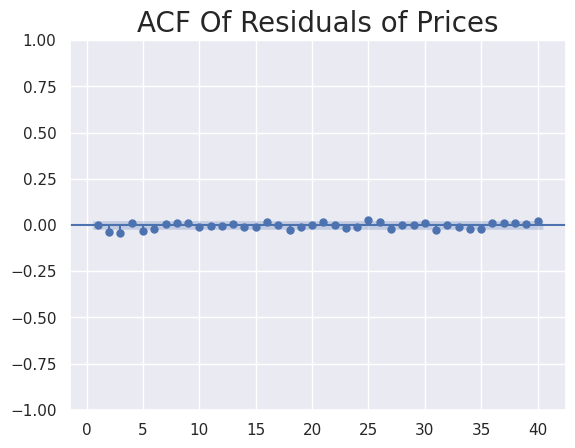

In [ ]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
model_ar_6_ma_6 = ARIMA(df.market_value, order=(6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -34019.415
Date:                Sun, 15 Oct 2023   AIC                          68066.830
Time:                        02:01:43   BIC                          68161.084
Sample:                             0   HQIC                         68099.507
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    678.234      7.961      0.000    4070.192    6728.822
ar.L1          0.7186      0.159      4.534      0.000       0.408       1.029
ar.L2          0.3673      0.202      1.815      0.070      -0.029       0.764
ar.L3         -0.6025      0.174     -3.457      0.001      -0.944      -0.261
ar.L4          0.4545      0.169      2.696      0.007       0.124       0.785
ar.L5         -0.0933      0.198     -0.470      0.638      -0.482       0.295
ar.L6          0.1539      0.125      1.227      0.220      -0.092       0.400
ma.L1          0.2695      0.159      1.697      0.090      -0.042       0.581
ma.L2         -0.1393      0.149     -0.936      0.350      -0.431       0.153
ma.L3          0.4475      0.139      3.227      0.001       0.176       0.719
ma.L4          0.0559      0.137      0.407      0.684      -0.213       0.325
ma.L5          0.1012      0.129      0.782      0.434      -0.152       0.355
ma.L6         -0.0665      0.013     -5.138      0.000      -0.092      -0.041
sigma2      3410.4537     38.765     87.978      0.000    3334.476    3486.431
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3230.79
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.28
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_5_ma_6 = ARIMA(df.market_value, order=(5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -34020.781
Date:                Sun, 15 Oct 2023   AIC                          68067.563
Time:                        02:02:31   BIC                          68155.085
Sample:                             0   HQIC                         68097.906
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5071    576.631      9.364      0.000    4269.331    6529.683
ar.L1          0.7054      0.195      3.626      0.000       0.324       1.087
ar.L2          0.3995      0.303      1.319      0.187      -0.194       0.993
ar.L3         -0.6883      0.251     -2.740      0.006      -1.181      -0.196
ar.L4          0.4041      0.194      2.079      0.038       0.023       0.785
ar.L5          0.1778      0.124      1.429      0.153      -0.066       0.422
ma.L1          0.2834      0.194      1.459      0.145      -0.097       0.664
ma.L2         -0.1571      0.170     -0.925      0.355      -0.490       0.176
ma.L3          0.5142      0.148      3.477      0.001       0.224       0.804
ma.L4          0.1714      0.128      1.343      0.179      -0.079       0.421
ma.L5         -0.0548      0.012     -4.720      0.000      -0.078      -0.032
ma.L6         -0.0741      0.014     -5.315      0.000      -0.101      -0.047
sigma2      3412.2401     38.708     88.153      0.000    3336.374    3488.106
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3271.03
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.28
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_6_ma_1 = ARIMA(df.market_value, order=(6,0,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6201
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -34022.567
Date:                Sun, 15 Oct 2023   AIC                          68063.135
Time:                        02:02:59   BIC                          68123.727
Sample:                             0   HQIC                         68084.142
                               - 6201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5399.5105    697.886      7.737      0.000    4031.678    6767.343
ar.L1          1.3559      0.159      8.506      0.000       1.044       1.668
ar.L2         -0.4020      0.157     -2.558      0.011      -0.710      -0.094
ar.L3          0.0074      0.015      0.485      0.627      -0.023       0.037
ar.L4          0.0660      0.014      4.606      0.000       0.038       0.094
ar.L5         -0.0740      0.016     -4.638      0.000      -0.105      -0.043
ar.L6          0.0461      0.008      5.478      0.000       0.030       0.063
ma.L1         -0.3680      0.160     -2.303      0.021      -0.681      -0.055
sigma2      3408.5980     37.624     90.597      0.000    3334.857    3482.339
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3377.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.29
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)


ARMA(5,6):  	 LL =  -34020.78138361189 	 AIC =  68067.56276722378
ARMA(6,1):  	 LL =  -34022.5674454055 	 AIC =  68063.134890811


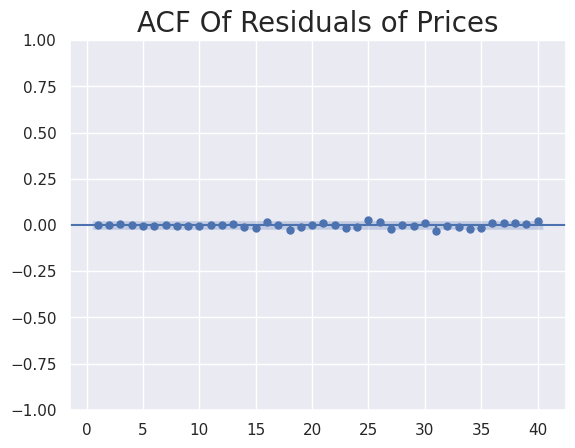

In [ ]:

df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

ARMA for Returns vs ARMA for Prices

In [ ]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)


ARMA(5,6):  	 LL =  -34020.78138361189 	 AIC =  68067.56276722378
ARMA(5,1):  	 LL =  -9475.486351959837 	 AIC =  18966.972703919673
